In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

# Regression

In [9]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
print(boston.DESCR[100:1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black p

In [38]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

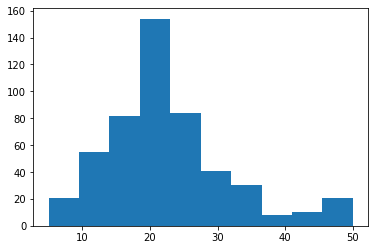

In [17]:
plt.hist(boston.target)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

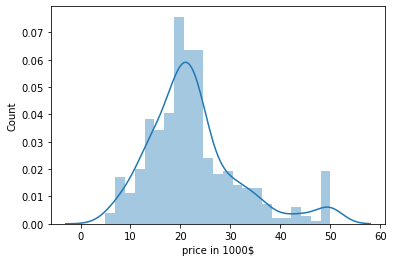

In [21]:
#sns.histplot(boston.target)
sns.distplot(boston.target)
plt.xlabel('price in 1000$')
plt.ylabel('Count')

In [40]:
N = df.shape[0]
N

506

In [43]:
def MAE(pred, true):
    return (1/N)*sum(abs(pred - true))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
clf = LinearRegression()

In [24]:
model = clf.fit(boston.data, boston.target)

In [27]:
weights = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
weights.columns = ['Features', 'Weights']
weights

,Features,Weights
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [28]:
pred = model.predict(boston.data)

In [32]:
preds = pd.DataFrame(list(zip(pred, boston.target)))
preds.columns = ['Pred','True']
preds

,Pred,True
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2
...,...,...
501,23.533341,22.4
502,22.375719,20.6
503,27.627426,23.9
504,26.127967,22.0


In [44]:
print('Mean abdolure error = ', MAE(pred, boston.target))

Mean abdolure error =  3.2708628109003133


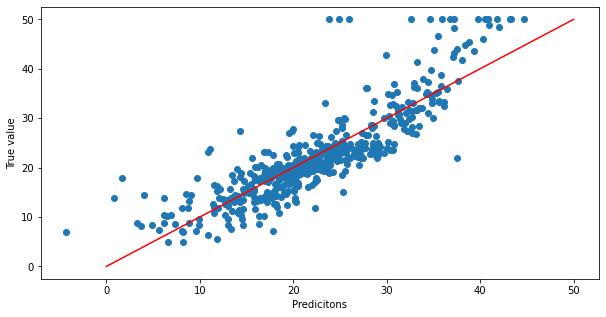

In [36]:
plt.figure(figsize = (10,5))
plt.scatter(pred, boston.target)
plt.xlabel('Predicitons')
plt.ylabel('True value')
plt.plot([0,50],[0,50], color = 'red')

# Classification

In [46]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

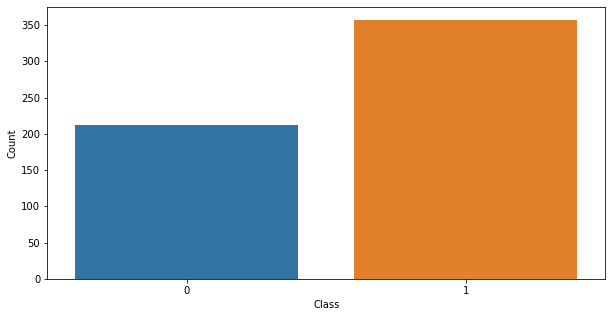

In [52]:
plt.figure(figsize = (10,5))
sns.countplot(cancer.target)
plt.xlabel('Class')
plt.ylabel('Count')

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf_lr = LogisticRegression()

In [55]:
model = clf_lr.fit(cancer.data, cancer.target)

C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
print(model.coef_)

[[ 0.89680513  0.41125142  0.38514636 -0.01926437 -0.03198397 -0.15315004
  -0.21472573 -0.09022295 -0.04439484 -0.00876257  0.03799519  0.34182074
   0.11158654 -0.11659631 -0.00292402 -0.03318941 -0.04611837 -0.01179554
  -0.01075495 -0.00306019  0.95110451 -0.50606723 -0.29408753 -0.01403146
  -0.05836928 -0.47971849 -0.59708101 -0.17408    -0.14185183 -0.04575002]]


In [63]:
preds = model.predict(cancer.data)
preds[:10]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [64]:
preds = model.predict_proba(cancer.data)
preds[:10]

array([[1.00000000e+00, 1.79547073e-16],
       [9.99999994e-01, 5.51157099e-09],
       [9.99999944e-01, 5.57692063e-08],
       [1.87075076e-01, 8.12924924e-01],
       [9.99998071e-01, 1.92901912e-06],
       [7.47755441e-01, 2.52244559e-01],
       [9.99999749e-01, 2.51245914e-07],
       [9.82058749e-01, 1.79412514e-02],
       [7.19723639e-01, 2.80276361e-01],
       [9.80963142e-01, 1.90368582e-02]])

In [65]:
print('Accucary score = ', model.score(cancer.data, cancer.target))

Accucary score =  0.9437609841827768


In [67]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}